In [2]:
# Histogram Equalization is a technique in image processing used to improve the contrast of an image.
# It works by adjusting the intensity distribution of the image so that the pixel values are spread out more evenly,
# thus enhancing the visual contrast. The idea is to flatten and stretch the image’s histogram so that all intensity 
# levels are utilized more effectively, especially in regions where pixel intensities are concentrated.

house_tree_image_pixel_data max 255
house_tree_image_pixel_data min 0


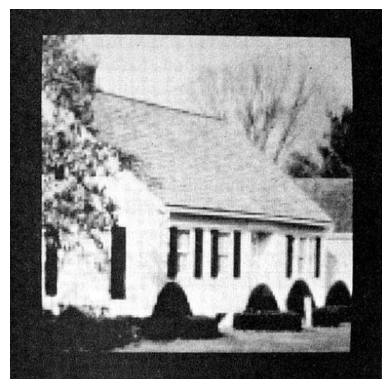

In [15]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

# https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.convert
image = Image.open("house_and_tree.jpg").convert("L")

# Convert the image to a NumPy array
house_tree_image_pixel_data = np.array(image)

print("house_tree_image_pixel_data max", house_tree_image_pixel_data.max())
print("house_tree_image_pixel_data min", house_tree_image_pixel_data.min())

# Display the image using Matplotlib
plt.imshow(house_tree_image_pixel_data, cmap='gray')
plt.axis('off')  # Turn off axis labels
plt.show()

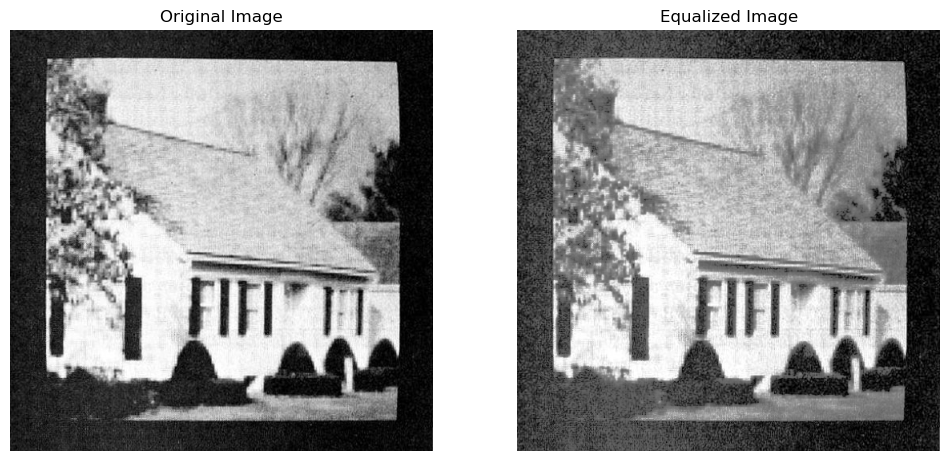

In [27]:
# Apply histogram equalization
equalized_image = cv2.equalizeHist(house_tree_image_pixel_data)

# Plot the original and equalized images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(house_tree_image_pixel_data, cmap='gray')
plt.title("Original Image")
plt.axis("off") 

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title("Equalized Image")
plt.axis("off") 

plt.show()


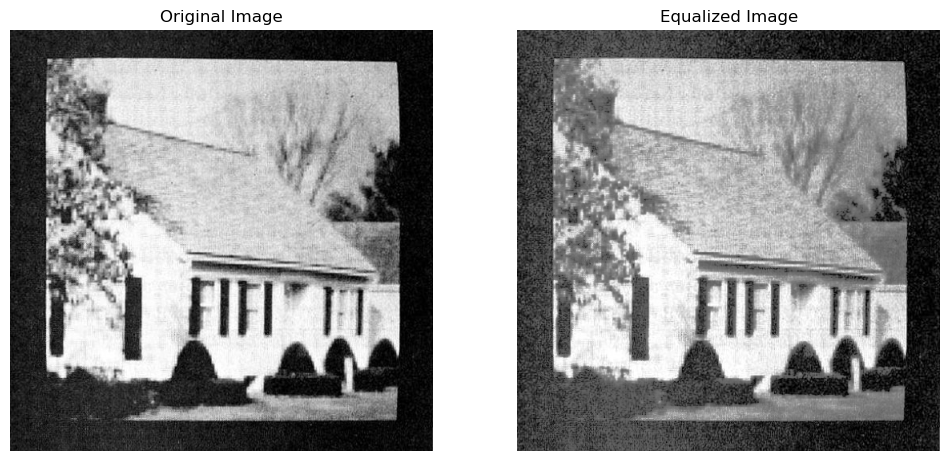

In [31]:
from PIL import Image
import matplotlib.pyplot as plt

def compute_histogram(image):
    """ Compute histogram of pixel intensities. """
    hist = [0] * 256  # 256 intensity levels (0-255)
    width, height = image.size
    
    for x in range(width):
        for y in range(height):
            pixel = image.getpixel((x, y))
            hist[pixel] += 1  # Count pixel occurrence

    return hist

def compute_cdf(hist):
    """ Compute the Cumulative Distribution Function (CDF). """
    cdf = [0] * 256
    cdf[0] = hist[0]  # First value remains the same

    for i in range(1, 256):
        cdf[i] = cdf[i - 1] + hist[i]  # Cumulative sum

    return cdf

def normalize_cdf(cdf, total_pixels):
    """ Normalize the CDF to scale pixel values to 0-255. """
    min_cdf = min(cdf)  # Find the smallest non-zero CDF value
    equalized_values = [0] * 256  

    for i in range(256):
        equalized_values[i] = round(((cdf[i] - min_cdf) / (total_pixels - min_cdf)) * 255)

    return equalized_values

def apply_equalization(image, equalized_values):
    """ Apply histogram equalization using the computed transformation. """
    width, height = image.size
    new_image = Image.new("L", (width, height))  # Create a new grayscale image

    for x in range(width):
        for y in range(height):
            old_pixel = image.getpixel((x, y))
            new_pixel = equalized_values[old_pixel]
            new_image.putpixel((x, y), new_pixel)

    return new_image

def histogram_equalization(image):
    """ Perform histogram equalization on a grayscale image (without NumPy). """
    hist = compute_histogram(image)  # Step 1: Compute histogram
    cdf = compute_cdf(hist)          # Step 2: Compute CDF
    equalized_values = normalize_cdf(cdf, image.size[0] * image.size[1])  # Step 3: Normalize
    return apply_equalization(image, equalized_values)  # Step 4: Apply

# Load and process image
image = Image.open("house_and_tree.jpg").convert("L")  # Convert to grayscale
equalized_image = histogram_equalization(image)

# Plot the original and equalized images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title("Equalized Image")
plt.axis("off")

plt.show()
